Let's first visualize the downloaded DEM file

File Bounds: BoundingBox(left=446320.0, bottom=4238528.000032917, right=449477.0, top=4241739.000032917)
Coordinate System: EPSG:26917


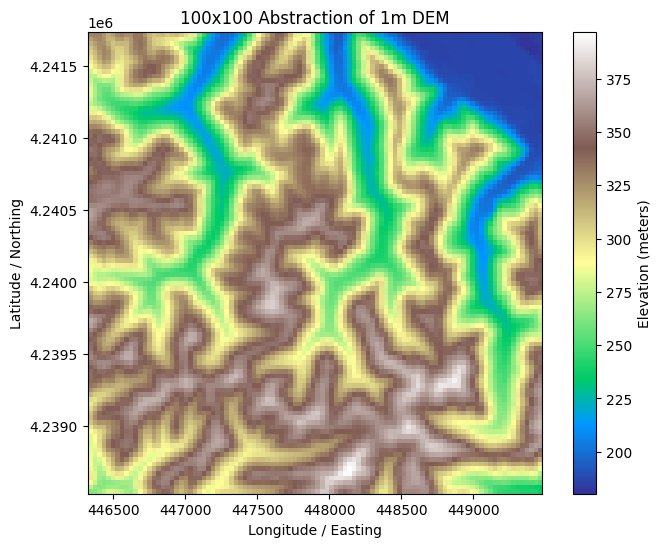

In [2]:
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import numpy as np

def get_grid_from_local_dem(file_path, n_size):
    """
    Automatically detects bounds from a local 1m DEM and 
    resamples it to an N x N grid.
    """
    with rasterio.open(file_path) as dataset:
        # 1. Automatically get metadata/bounds
        bounds = dataset.bounds
        crs = dataset.crs
        print(f"File Bounds: {bounds}")
        print(f"Coordinate System: {crs}")

        # 2. Resample during read (Memory efficient)
        # We specify the output shape as (1, n_size, n_size) for (band, height, width)
        data = dataset.read(
            1,
            out_shape=(n_size, n_size),
            resampling=Resampling.bilinear # Or Resampling.max to preserve peaks
        )
        
        # 3. Handle NoData values (common in 1m DEMs)
        if dataset.nodata is not None:
            data = np.where(data == dataset.nodata, np.nan, data)

        return data, bounds

# --- Execution ---
# Replace with your West Virginia file path
dem_path = 'WV_DEM.tif' 
N = 100 

grid, dem_bounds = get_grid_from_local_dem(dem_path, N)

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(grid, cmap='terrain', extent=[dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top])
plt.colorbar(label='Elevation (meters)')
plt.title(f"{N}x{N} Abstraction of 1m DEM")
plt.xlabel("Longitude / Easting")
plt.ylabel("Latitude / Northing")
plt.show()